In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)
import datetime as dt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [67]:
data = pd.read_csv("C:/Users/barsiwal/Desktop/Kaggle/train.csv")
#data_test = pd.read_csv("C:/Users/barsiwal/Desktop/Kaggle/test.csv")
#data = data_train.append(data_test)
data.shape

(1460, 81)

In [68]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [69]:
data.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [70]:
data.columns[data.dtypes == 'object']

Index([u'MSZoning', u'Street', u'Alley', u'LotShape', u'LandContour',
       u'Utilities', u'LotConfig', u'LandSlope', u'Neighborhood',
       u'Condition1', u'Condition2', u'BldgType', u'HouseStyle', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2', u'Heating',
       u'HeatingQC', u'CentralAir', u'Electrical', u'KitchenQual',
       u'Functional', u'FireplaceQu', u'GarageType', u'GarageFinish',
       u'GarageQual', u'GarageCond', u'PavedDrive', u'PoolQC', u'Fence',
       u'MiscFeature', u'SaleType', u'SaleCondition'],
      dtype='object')

The dataset consists of 43 categorical columns and 38 numerical columns

As mentioned in the data description file, NAN values in most of the categorical columns represent the feature is not available 
in that house.

In [74]:
# Thus replacing the NA's for such variables with 'None'
dic= {"BsmtQual": 'None', 'BsmtCond' : 'None', 'BsmtExposure' : 'None', 'BsmtFinType1' :'None',
      'BsmtFinType2' : 'None', 'FireplaceQu' : 'None', 'GarageFinish' :'None','GarageQual':'None', 'GarageCond':'None',
     'PoolQC': 'None', 'Fence': 'None','MiscFeature' :'None', 'Alley' : 'None', 'GarageType':'None','GarageYrBlt' : 'None'}
data = data.fillna(dic)

In [76]:
##  Checking columns with missing values
na_count = data.isnull().sum()/len(data)*100
na_count[na_count > 0]

LotFrontage    17.739726
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

## Correlation

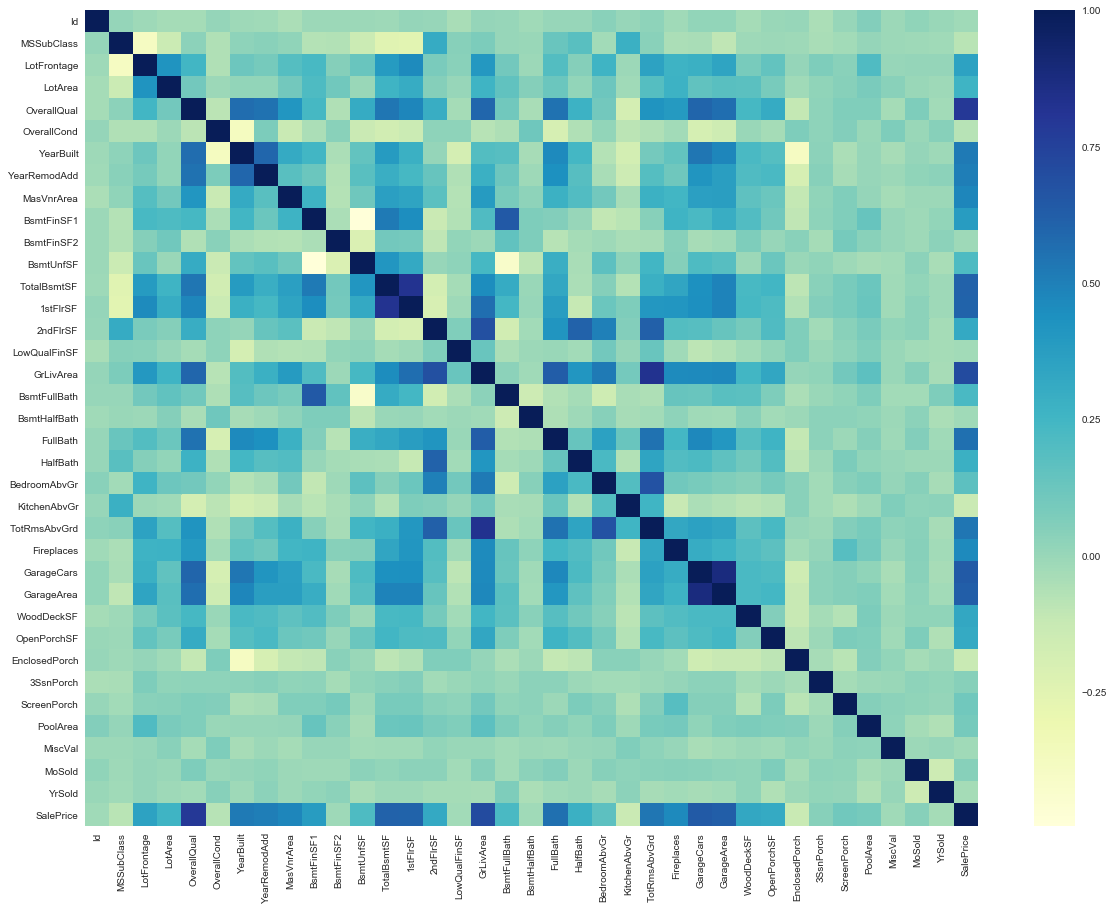

In [90]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(),cmap="YlGnBu")

### Key Takeaways: 
1. GarageCars and GarageArea are highly correlated. It would make sense to use any one of the two features as more the             GarageArea, more number of cars can fit into the garage.

2. OverallQuality and GriLivArea come out to be highly correlated with the Sales Price.

3. The variable LotFrontage that consists of 18% missing values does not correlate with the Sales Price very highly. Hence we      can drop this column.

4. TotalBsmtSF and 1stFlrSf are highly correlated. The probability of them being the same or close is high. 
   Further investigation is required.
  

### TotalBsmtSF and 1stFlrSF

In [100]:
# % of observations with TotalBsmtSF and 1stFlrSF equal 
float(len(data[['TotalBsmtSF','1stFlrSF']][data['TotalBsmtSF'] == data['1stFlrSF']])) / len(data) * 100

50.753424657534254

Wow 51%

In [108]:
# % of observations with TotalBsmtSf not equal to zero and not equal to 1stFlrSF
float(len(data[['TotalBsmtSF','1stFlrSF']][(data['TotalBsmtSF'] != data['1stFlrSF']) & (data['TotalBsmtSF'] != 0)])) / len(data) *100

46.71232876712329

However we still have 47% of the observations whose TotalBsmtSf are not equal to 1stFlrSF. Seems like we'll have to use both.

### TotalBsmtSf, BsmtFinSF1, BsmtFinSF2, BsmtUnFinSf

In [111]:
len(data[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']].sum(axis = 1) == data['TotalBsmtSF'])/ float(len(data)) *100

100.0

For the variables TotalBsmtSf, BsmtFinSF1, BsmtFinSF2, BsmtUnFinSf, it would make sense to either use only TotalBsmtSF or the other three since TotalBsmtSf is just a summumation of them. And looking at the correlation, TotalBsmtSf seems to be highly correlated with the Sales Price.